In [116]:
# Merc.pynb   - Data visualisation and analysis of Mercedes Benz Greener Manufacturing dataset

# Objective   - Predict the length of time required to test a car in the factory. 

# Data source -  'https://www.kaggle.com/c/mercedes-benz-greener-manufacturing'

# Author      -  Adil Khan

In [414]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import cluster, linear_model, ensemble, svm, naive_bayes, metrics
from keras.models import Sequential
from keras.layers import Dense

In [397]:
path = '/Users/Adil/Documents/Data Science/Competitions/Merc'
os.chdir(path)
df = pd.read_csv('train.csv').sample(frac=1)
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Analysis

## Categorical or Binary

In [398]:
catFeat = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
numFeat= [i for i in df.columns if i not in catFeat and i != 'ID']

## Missing Values

In [399]:
print('Number of missing values =',df.isnull().sum().sum())

empty = [i for i in numFeat if df[i].sum()==0]
print('Number of columns where all instances are 0 = ' + str(len(empty)))

full = [i for i in numFeat if df[i].sum()==4209]
print('Number of columns where all instances are 1 = ' + str(len(full)))

#Drop empty columns
df=df.drop(empty, axis=1)

Number of missing values = 0
Number of columns where all instances are 0 = 12
Number of columns where all instances are 1 = 0


## Correlations

### Correlations heatmap

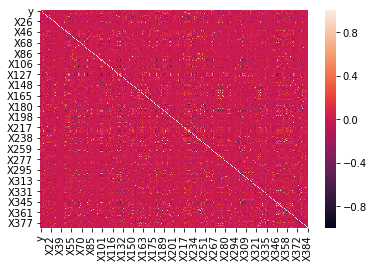

In [418]:
numFeat= [i for i in df.columns if i not in catFeat and i != 'ID']
corr=df[numFeat].corr()
sns.heatmap(corr);


### Feature-Label Correlations

abolute mean = 0.09273427949999181
absolute std = 0.10900280437767519


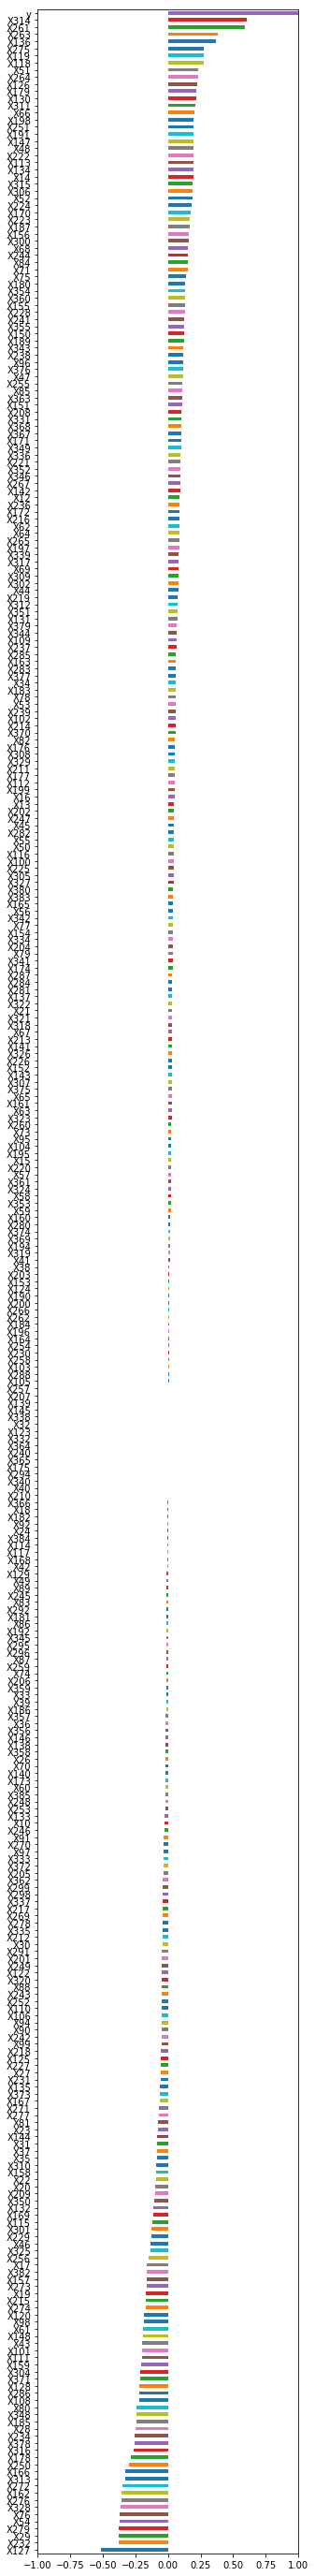

In [417]:
print('abolute mean = ' +str(corr.loc['y'].abs().mean()))
print('absolute std = ' +str(corr.loc['y'].abs().std()))
corr.loc['y'].sort_values().plot.barh(figsize=(5,50),xlim=(-1,1));

### Find and drop duplicate features (i.e. corr = 1 )

In [403]:
duplicated=[]
for i in corr.columns:
    for j in corr.columns:
        if i != j:
            if abs(corr[i].loc[j])==1:
                duplicated.append([i,j])
count=0
for i in duplicated:
    if i[::-1] in duplicated:
         del duplicated[count]
    count += 1
duplicated = [duplicated[i][1] for i in range(len(duplicated))]

df=df.drop(duplicated, axis=1)

# Prepare for analysis

## One Hot Coding

In [404]:
catDummyList = []
for i in catFeat:
    catDummyList.append([])
    i_length = len(df[i].unique())
    catDummyList[-1]=[i+'_dummy_%d' %j for j in range(i_length)]

dummies = pd.DataFrame()
for i,j in enumerate(catFeat):
    x=pd.get_dummies(df[j])
    x.columns = catDummyList[i]
    dummies=pd.concat([dummies, x], axis=1)

    


## Stack

In [ ]:
numFeat= [i for i in df.columns if i not in catFeat and i != 'ID' and i!='y']
stacked = pd.concat([df[numFeat],dummies], axis=1)


## Assign lables, Split data into Training and Testing sets

In [406]:
yList = np.asarray(df['y'])
xList=np.asarray(stacked)

xListTrain = [xList[i] for i in range(len(xList)) if i%4!=0]
xListTest = [xList[i] for i in range(len(xList)) if i%4==0]
yListTrain = [yList[i] for i in range(len(yList)) if i%4!=0]
yListTest = [yList[i] for i in range(len(yList)) if i%4==0]

# Models

## Linear Regression

In [12]:
model = linear_model.LinearRegression()
model.fit(xListTrain,yListTrain)
print('\tTrain Score:\t', model.score(xListTrain,yListTrain))
print('\tTest Score:\t', model.score(xListTest,yListTest))

	Train Score:	 0.614849550917903
	Test Score:	 -2.9362832369685833e+20


## Ridge Regressions

In [13]:
model = linear_model.Ridge(alpha=100)
model.fit(xListTrain,yListTrain)
print('\tTrain Score:\t', model.score(xListTrain,yListTrain))
print('\tTest Score:\t', model.score(xListTest,yListTest)) 


	Train Score:	 0.5673599714962207
	Test Score:	 0.6009359475772735


## Lars Lasso Regressions

In [14]:
model = linear_model.LassoLars(alpha=0.01, max_iter=20,eps=0.1)
model.fit(xListTrain,yListTrain)
print('\tTrain Score:\t', model.score(xListTrain,yListTrain))
print('\tTest Score:\t', model.score(xListTest,yListTest)) 


pathlist=[]
for i in range(len(model.coef_path_[0])):
    for j in range(len(model.coef_path_)):
        if model.coef_path_[j][i] != 0:
            if j not in pathlist:
                pathlist.append(j)

print('\nFirst 10 feature coefficients to become non-zero:\n')
for i in range(10):
    print(stacked.columns[i])

	Train Score:	 0.5336155794457482
	Test Score:	 0.6030483733406147

First 10 feature coefficients to become non-zero:

X10
X12
X13
X14
X15
X16
X18
X19
X20
X21


## Random Forest

	Train Score:	 0.6354083379240157
	Test Score:	 0.5810179461249527


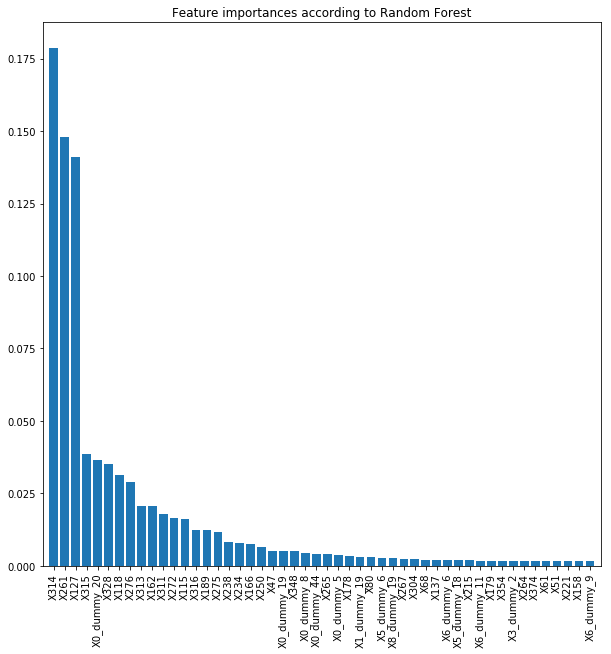

In [407]:
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(xList,yList)
print('\tTrain Score:\t', model.score(xListTrain,yListTrain))
print('\tTest Score:\t', model.score(xListTest,yListTest)) 

feat_names = stacked.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:50]

plt.figure(figsize=(10,10))
plt.title('Feature importances according to Random Forest')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


## Gradient Boosting

In [16]:
model = ensemble.GradientBoostingRegressor(n_estimators=1000,max_depth=1)
model.fit(xListTrain,yListTrain)
print('\tTrain Score:\t', model.score(xListTrain,yListTrain))
print('\tTest Score:\t', model.score(xListTest,yListTest))

	Train Score:	 0.5914852073440378
	Test Score:	 0.6203317508087449


## Support Vector Regressor

In [17]:
model = svm.SVR()
model.fit(xListTrain,yListTrain)
print('\tTrain Score:\t', model.score(xListTrain,yListTrain))
print('\tTest Score:\t', model.score(xListTest,yListTest)) 

	Train Score:	 0.3932745753455409
	Test Score:	 0.44850049893223576


## Clustering

### KMeans

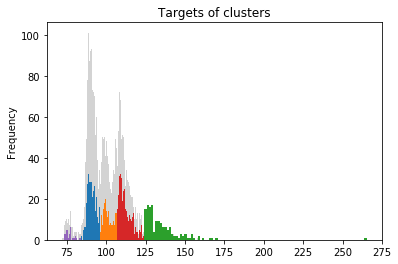

In [18]:
numClusters=5

#Cluster entire dataset, including target

clstr = pd.concat([stacked, pd.DataFrame({'target':yList})], axis =1)
cmodel=cluster.KMeans(n_clusters=numClusters)
cmodel.fit(clstr)

# Add cluster labels into dataframe
clstrd = pd.concat([clstr, pd.DataFrame({'cluster':cmodel.labels_})], axis =1)

# Group by cluster label
grouped = clstrd[['target','cluster']].groupby('cluster')
g=[grouped.get_group(i) for i in range(len(grouped))]

# Plot histogram
numBins=100
clstrd['target'].plot.hist(bins=numBins*len(g),color='lightGray',title='Targets of clusters')
for i in range(len(g)):
    g[i]['target'].plot.hist(bins=numBins)


### Split cluster labels into training and testing sets

In [19]:
cListTrain = [cmodel.labels_[i] for i in range(len(cmodel.labels_)) if i%4!=0]
cListTest = [cmodel.labels_[i] for i in range(len(cmodel.labels_)) if i%4==0]

### Gradient Boosting to predict cluster from data set excluding target

In [20]:
model = ensemble.GradientBoostingClassifier(n_estimators=100,max_depth=1)
model.fit(xListTrain,cListTrain)
print('\tTrain Score:\t', model.score(xListTrain,cListTrain))
print('\tTest Score:\t', model.score(xListTest,cListTest))

	Train Score:	 0.7785171102661597
	Test Score:	 0.7464387464387464


## Using a Neural Network

In [415]:
# Create model
model = Sequential()
model.add(Dense(130, input_dim=481, kernel_initializer='normal', activation='relu'))
model.add(Dense(40, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit to data
model.fit(np.array(xListTrain), np.array(yListTrain), epochs=50, batch_size=80);

Epoch 1/50
3156/3156 [==============================] - 2s 627us/step - loss: 9335.6794
Epoch 2/50
3156/3156 [==============================] - 0s 153us/step - loss: 1839.7786
Epoch 3/50
3156/3156 [==============================] - 0s 155us/step - loss: 213.0092
Epoch 4/50
3156/3156 [==============================] - 1s 199us/step - loss: 151.4929
Epoch 5/50
3156/3156 [==============================] - 0s 144us/step - loss: 118.6665
Epoch 6/50
3156/3156 [==============================] - 0s 135us/step - loss: 99.9833
Epoch 7/50
3156/3156 [==============================] - 0s 134us/step - loss: 88.9171
Epoch 8/50
3156/3156 [==============================] - 1s 159us/step - loss: 82.2390
Epoch 9/50
3156/3156 [==============================] - 1s 169us/step - loss: 77.8971
Epoch 10/50
3156/3156 [==============================] - 0s 142us/step - loss: 75.1127
Epoch 11/50
3156/3156 [==============================] - 0s 154us/step - loss: 74.0450
Epoch 12/50
3156/3156 [======================

In [416]:
y_pred_train = model.predict(np.array(xListTrain))
y_pred_test = model.predict(np.array(xListTest))
print('\tTrain Score:\t', metrics.r2_score(yListTrain,y_pred_train))
print('\tTest Score:\t', metrics.r2_score(yListTest,y_pred_test))


	Train Score:	 0.6320299731264825
	Test Score:	 0.5511766844526871


# Summary

<p>Random Forest were the strongest algorithm with a dev score of 0.557 and probably the most robust as well. NN, Gradient Boosting, Ridge and LARS also performed well.</p>
<p>X314, X261, X127 have highest importance according to Random Forest. Result confirmed by correlation data.</p> 
<p>Data was clustered with kMeans (k=5) and the clusters predicted with GB with 74% accuracy.</p>  

## Upload

In [413]:
df2 = pd.read_csv('test.csv')
ID = df2['ID']

#Drop empty columns
df2=df2.drop(empty, axis=1)

#Drop duplicate columns
df2=df2.drop(duplicated, axis=1)

#Create dummy variables
catDummyList2 = []
for i in catFeat:
    catDummyList2.append([])
    i_length = len(df2[i].unique())
    catDummyList2[-1]=[i+'_dummy_%d' %j for j in range(i_length)]

dummies2 = pd.DataFrame()
for i,j in enumerate(catFeat):
    x=pd.get_dummies(df2[j])
    x.columns = catDummyList2[i]
    dummies2=pd.concat([dummies2, x], axis=1)

#Remove dummy variables that weren't in training set
drop_dummies = [dummy for dummy in dummies2 if dummy not in dummies]
dummies2 = dummies2.drop(drop_dummies,axis=1)

#Stack
numFeat2= [i for i in df2.columns if i not in catFeat and i != 'ID' and i!='y']
stacked2 = pd.concat([df2[numFeat2],dummies2], axis=1)
xList2=np.asarray(stacked2)

#Fit Model using all data
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(xList,yList)
y_pred = list(model.predict(xList2))

#Submit
dfout = pd.DataFrame({'ID':ID,'y':y_pred})
dfout.to_csv('submission.csv',index = False)

Best score on test data obtained with Random Forest: 0.54483. The top score was 0.55550